In [19]:
import pandas as pd 
import json
from arcgis.features import FeatureLayer

In [20]:
url = 'https://services1.arcgis.com/79kfd2K6fskCAkyg/arcgis/rest/services/FoodServiceData/FeatureServer/0'

batch_size = 1000  # Number of records to retrieve per batch
offset = 0  # Initial offset value
data_list = []
# ​Create the feature layer object
feature_layer = FeatureLayer(url)

while True:
    # Query the feature layer with pagination
    query_result = feature_layer.query(where='1=1', out_fields='*', return_geometry=False, result_offset=offset, result_record_count=batch_size)
    
    # Retrieve the features from the query result
    features = query_result.features
    
    # Process the data for the current batch
    for feature in features:
        data_list.append(feature.attributes)
    
    # Break the loop if the response is empty or the desired number of records is reached
    if len(features) == 0 or len(data_list) >= 1000:
        break
    
    # Increment the offset by the batch size
    offset += batch_size
# Create a DataFrame from the data list
df = pd.DataFrame(data_list)

In [21]:
df.to_csv("json_files/local_working.csv")

Adove API call is working. I will use the CSV file so I dont keep pulling from the api while working on below logic. 

In [22]:
df = pd.read_csv("json_files/local_working.csv")

Drops cols we don't need. 

In [23]:
cols_drop = ['EstablishmentID', 'InspectionID', 'PlaceName', 'Address2', 'TypeDescription', 'NameSearch', 'Intersection']
df.drop(cols_drop, axis=1, inplace=True)

In [24]:
df.head(2)

,Unnamed: 0,Ins_TypeDesc,EstablishmentName,Address,City,State,Zip,InspectionDate,score,Grade,ObjectId
0,0,REGULAR,OKOLONA ELEMENTARY SCHOOL,7606 PRESTON HWY,LOUISVILLE,KY,40219,2023-09-05 00:00:00,100,A,1
1,1,REGULAR,OUR LADY OF LOURDES,510 BRECKENRIDGE LN,LOUISVILLE,KY,40207,2022-10-13 00:00:00,100,A,2


In [25]:
# df.shape

In [26]:
df['InspectionDate'] = pd.to_datetime(df['InspectionDate'])
df.head(2)

,Unnamed: 0,Ins_TypeDesc,EstablishmentName,Address,City,State,Zip,InspectionDate,score,Grade,ObjectId
0,0,REGULAR,OKOLONA ELEMENTARY SCHOOL,7606 PRESTON HWY,LOUISVILLE,KY,40219,2023-09-05,100,A,1
1,1,REGULAR,OUR LADY OF LOURDES,510 BRECKENRIDGE LN,LOUISVILLE,KY,40207,2022-10-13,100,A,2


In [27]:
# df = df[(df['score'] != 0)]
# df = df.sort_values(by='score', ascending=True)
# # df = df.reset_index()
# df

In [28]:
# sorting inspection dates
df.sort_values('InspectionDate', ascending=False, inplace=True)
# dropping duplicate rest based on its first occurrence
df.drop_duplicates(subset='EstablishmentName', keep='first', inplace=True)

In [29]:
# testing the dups dropped
# est_counts = df['EstablishmentName'].value_counts()
# est_counts.plot()

In [30]:
# confirmed that the code worked with the shape of the df 
df.shape

(4077, 11)

In [31]:
processed_data = df.to_json(orient='records')

In [32]:
# Save the processed data as JSON to a file
with open('json_files/processed_data.json', 'w') as file:
    json.dump(processed_data, file)

In [33]:
df.value_counts('score')

score
100    1569
99      707
98      584
97      447
96      287
95      178
0       109
94       82
93       57
92       30
91       10
90        8
89        6
76        1
87        1
88        1
dtype: int64

In [34]:
df = df.sort_values(by='score', ascending=True)

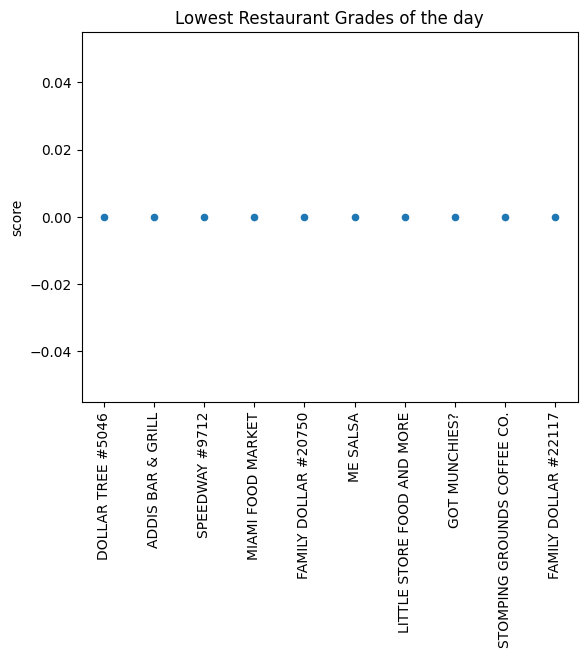

In [35]:
df = df[0:10]
df.plot.scatter( title = "Lowest Restaurant Grades of the day",x = 'EstablishmentName', y = 'score', rot = 'vertical', xlabel = "");

In [36]:
df.to_csv("json_files/local_working.csv")